<a href="https://colab.research.google.com/github/iakashpaul/TryMate/blob/master/trymate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/svip-lab/impersonator.git

Cloning into 'impersonator'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 1166 (delta 73), reused 85 (delta 38), pack-reused 1019
Receiving objects: 100% (1166/1166), 74.30 MiB | 29.02 MiB/s, done.
Resolving deltas: 100% (500/500), done.


In [2]:
%cd impersonator/

/content/impersonator


In [3]:
!ls

assets		  environment.yml     outputs		scripts
data		  impersonator.ipynb  README.md		thirdparty
demo_imitator.py  LICENSE	      requirements.txt	tools
demo_swap.py	  models	      run_imitator.py	train.py
demo_view.py	  networks	      run_swap.py	utils
doc		  options	      run_view.py


In [0]:
!pip install -r requirements.txt

In [0]:
%cd thirdparty/neural_renderer
!python setup.py install
%cd ..

In [6]:
%cd ..
!ls

/content/impersonator
assets		  environment.yml     outputs		scripts
data		  impersonator.ipynb  README.md		thirdparty
demo_imitator.py  LICENSE	      requirements.txt	tools
demo_swap.py	  models	      run_imitator.py	train.py
demo_view.py	  networks	      run_swap.py	utils
doc		  options	      run_view.py


In [7]:
!wget -O assets/pretrains.zip https://1drv.ws/u/s!AjjUqiJZsj8whLNw4QyntCMsDKQjSg?e=L77Elv

--2019-11-09 09:44:28--  https://1drv.ws/u/s!AjjUqiJZsj8whLNw4QyntCMsDKQjSg?e=L77Elv
Resolving 1drv.ws (1drv.ws)... 168.235.93.122
Connecting to 1drv.ws (1drv.ws)|168.235.93.122|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: https://e4qc8w.dm.files.1drv.com/y4m1U9y7JgTyHO_KPTqRBi7CG1G0hVQGVbNrh-gw6eEv76w1MkLUA0n8D8AHA27E3f4z2roaUvdMJEGTUr4atynStuTl5HeS2qQ-m0AnacXhOHlDh5HpjygHd6vDCHGqv-QRC7QqIK_WvIbzhHGmJ2Ttmtvc4jsR53MXakD7Sm6IKMd8rzA3lJ3fdAa7zj5NsvKv-WQ5ijoMIGLQ1ElGuBJ0Q/pretrains.zip?download&psid=1 [following]
--2019-11-09 09:44:29--  https://e4qc8w.dm.files.1drv.com/y4m1U9y7JgTyHO_KPTqRBi7CG1G0hVQGVbNrh-gw6eEv76w1MkLUA0n8D8AHA27E3f4z2roaUvdMJEGTUr4atynStuTl5HeS2qQ-m0AnacXhOHlDh5HpjygHd6vDCHGqv-QRC7QqIK_WvIbzhHGmJ2Ttmtvc4jsR53MXakD7Sm6IKMd8rzA3lJ3fdAa7zj5NsvKv-WQ5ijoMIGLQ1ElGuBJ0Q/pretrains.zip?download&psid=1
Resolving e4qc8w.dm.files.1drv.com (e4qc8w.dm.files.1drv.com)... 13.107.42.12
Connecting to e4qc8w.dm.files.1drv.com (e4qc8w.dm.file

In [8]:
!wget -O outputs/checkpoints.zip https://1drv.ws/u/s!AjjUqiJZsj8whLNyoEh67Uu0LlxquA?e=dkOnhQ

--2019-11-09 09:44:40--  https://1drv.ws/u/s!AjjUqiJZsj8whLNyoEh67Uu0LlxquA?e=dkOnhQ
Resolving 1drv.ws (1drv.ws)... 168.235.93.122
Connecting to 1drv.ws (1drv.ws)|168.235.93.122|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: https://e4qm8w.dm.files.1drv.com/y4m1vUi166U2tZuEUy2Xdc2Te7VfUsWhebnyTDMscfQXCOF7pyWTiR7Xlgrtj1bDZc_sxTkCA2aCKtJrr0nZXaQ8ntMf9Ma0_hKiedV4t8Nour4yPIrlapfRKGNg-Ju1nfID1kLHPh1b3Qgs8hsVlpxFwkP9sKxh3lXa3W60yzXe9S_5ESDuPkGuxfMgCPWrzE2DGQmnZzpRAIl5oqtvriaBQ/checkpoints.zip?download&psid=1 [following]
--2019-11-09 09:44:41--  https://e4qm8w.dm.files.1drv.com/y4m1vUi166U2tZuEUy2Xdc2Te7VfUsWhebnyTDMscfQXCOF7pyWTiR7Xlgrtj1bDZc_sxTkCA2aCKtJrr0nZXaQ8ntMf9Ma0_hKiedV4t8Nour4yPIrlapfRKGNg-Ju1nfID1kLHPh1b3Qgs8hsVlpxFwkP9sKxh3lXa3W60yzXe9S_5ESDuPkGuxfMgCPWrzE2DGQmnZzpRAIl5oqtvriaBQ/checkpoints.zip?download&psid=1
Resolving e4qm8w.dm.files.1drv.com (e4qm8w.dm.files.1drv.com)... 13.107.42.12
Connecting to e4qm8w.dm.files.1drv.com (e4qm8w.dm.

In [9]:
!wget -O assets/samples.zip https://1drv.ws/u/s!AjjUqiJZsj8whLNz4BqnSgqrVwAXoQ?e=bC86db

--2019-11-09 09:45:17--  https://1drv.ws/u/s!AjjUqiJZsj8whLNz4BqnSgqrVwAXoQ?e=bC86db
Resolving 1drv.ws (1drv.ws)... 168.235.93.122
Connecting to 1drv.ws (1drv.ws)|168.235.93.122|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: https://e4qn8w.dm.files.1drv.com/y4m1cjZIwkGNwP95_t9ZjLDyqW0t8a5CCFkFCbqGEbjlO6-S4L_05kUha6aDrsgvTs6BXEf83Y0TyBJR49IadAd33vbWzyGZoFv0AtTY-knNjMhWZBUCZrt4Q55K36RdRjeXnHOhlh-HUanIeFHBwhORjO087N8fbtJ2G4U1RME-Y1mQT5GUbu4424zCKGH3qRdkxtvdWOAbL33LXklM7C4nw/samples.zip?download&psid=1 [following]
--2019-11-09 09:45:18--  https://e4qn8w.dm.files.1drv.com/y4m1cjZIwkGNwP95_t9ZjLDyqW0t8a5CCFkFCbqGEbjlO6-S4L_05kUha6aDrsgvTs6BXEf83Y0TyBJR49IadAd33vbWzyGZoFv0AtTY-knNjMhWZBUCZrt4Q55K36RdRjeXnHOhlh-HUanIeFHBwhORjO087N8fbtJ2G4U1RME-Y1mQT5GUbu4424zCKGH3qRdkxtvdWOAbL33LXklM7C4nw/samples.zip?download&psid=1
Resolving e4qn8w.dm.files.1drv.com (e4qn8w.dm.files.1drv.com)... 13.107.42.12
Connecting to e4qn8w.dm.files.1drv.com (e4qn8w.dm.files.1d

In [10]:
!ls

assets		  environment.yml     outputs		scripts
data		  impersonator.ipynb  README.md		thirdparty
demo_imitator.py  LICENSE	      requirements.txt	tools
demo_swap.py	  models	      run_imitator.py	train.py
demo_view.py	  networks	      run_swap.py	utils
doc		  options	      run_view.py


In [25]:
!python run_view.py --gpu_ids 0 --model viewer --output_dir ./outputs/results/  --src_path      ./assets/src_imgs/internet/men1_256.jpg  --bg_ks 13  --ft_ks 3 --has_detector  --post_tune --front_warp --bg_replace --save_res --ip https://53ec390b.ngrok.io --port 443

------------ Options -------------
T_pose: False
batch_size: 4
bg_ks: 13
bg_model: ./outputs/checkpoints/deepfillv2/net_epoch_50_id_G.pth
bg_replace: True
body_seg: False
cam_strategy: smooth
checkpoints_dir: ./outputs/checkpoints/
cond_nc: 3
data_dir: /p300/datasets/iPER
dataset_mode: iPER
debug: False
do_saturate_mask: False
face_model: assets/pretrains/sphere20a_20171020.pth
front_warp: True
ft_ks: 3
gen_name: impersonator
gpu_ids: 0
has_detector: True
hmr_model: assets/pretrains/hmr_tf2pt.pth
image_size: 256
images_folder: images_HD
ip: https://53ec390b.ngrok.io
is_train: False
load_epoch: 0
load_path: ./outputs/checkpoints/lwb_imper_fashion_place/net_epoch_30_id_G.pth
map_name: uv_seg
model: viewer
n_threads_test: 2
name: running
norm_type: instance
only_vis: False
output_dir: ./outputs/results/
part_info: assets/pretrains/smpl_part_info.json
port: 443
post_tune: True
pri_path: ./assets/samples/A_priors/imgs
repeat_num: 6
save_res: True
serial_batches: False
smpl_model: assets/pre

In [18]:
!ls


appearance		 novel		 samples.zip	     visuals
appearance_transfer.jpg  novel_view.jpg  src_imgs
motion			 pipeline.png	 table_1_update.png
motion_transfer.jpg	 pretrains.zip	 thumbnail.jpg


In [17]:
%cd assets

/content/impersonator/assets


In [0]:
!unzip samples.zip

In [20]:
!unzip pretrains.zip

Archive:  pretrains.zip
   creating: pretrains/
  inflating: pretrains/front_facial.json  
  inflating: pretrains/front_facial_larger.json  
  inflating: pretrains/head.json     
  inflating: pretrains/hmr_tf2pt.pth  
  inflating: pretrains/mapper.txt    
  inflating: pretrains/smpl_faces.npy  
  inflating: pretrains/smpl_model.pkl  
  inflating: pretrains/smpl_part_info.json  
  inflating: pretrains/sphere20a_20171020.pth  


In [22]:
%cd outputs/

/content/impersonator/outputs


In [23]:
!unzip checkpoints.zip

Archive:  checkpoints.zip
   creating: checkpoints/deepfillv2/
  inflating: checkpoints/deepfillv2/net_epoch_50_id_G.pth  
   creating: checkpoints/lwb_imper/
  inflating: checkpoints/lwb_imper/net_epoch_30_id_G.pth  
   creating: checkpoints/lwb_imper_fashion_place/
  inflating: checkpoints/lwb_imper_fashion_place/net_epoch_30_id_G.pth  
   creating: checkpoints/lwb_imper_place/
  inflating: checkpoints/lwb_imper_place/net_epoch_30_id_G.pth  


In [24]:
%cd ..

/content/impersonator


In [0]:
!python run_swap.py --gpu_ids 0 --model imitator --output_dir ./outputs/results/ --src_path      ./assets/src_imgs/imper_A_Pose/024_8_2_0000.jpg  --tgt_path      ./assets/src_imgs/fashion_man/Sweatshirts_Hoodies-id_0000680701_4_full.jpg  --bg_ks 13  --ft_ks 3 --has_detector  --post_tune  --front_warp --swap_part body  --save_res --ip http://51cb7644.ngrok.io --port 80

In [0]:
from IPython.display import Image, display
display(Image('./assets/src_imgs/imper_A_Pose/024_8_2_0000.jpg'))
display(Image('./assets/src_imgs/fashion_man/Sweatshirts_Hoodies-id_0000680701_4_full.jpg'))
display(Image('./outputs/results/swappers/024_8_2_0000->Sweatshirts_Hoodies-id_0000680701_4_full.png'))
# ./outputs/results/swappers/024_8_2_0000->10010004960589525720_1.png

In [57]:
!python run_swap.py --gpu_ids 0 --model imitator --output_dir ./outputs/results/ --src_path  /content/chad.jpg  --tgt_path     /content/ranveer.jpg  --bg_ks 13  --ft_ks 3 --has_detector  --post_tune  --front_warp --swap_part body  --save_res --ip http://51cb7644.ngrok.io --port 80

[TerminalIPythonApp] WARNING | GUI event loop or pylab initialization failed

UnknownBackendTraceback (most recent call last)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py in enable_matplotlib(self, gui)
   2953         # Now we must activate the gui pylab wants to use, and fix %run to take
   2954         # plot updates into account
-> 2955         self.enable_gui(gui)
   2956         self.magics_manager.registry['ExecutionMagics'].default_runner = \
   2957             pt.mpl_runner(self.safe_execfile)

/usr/local/lib/python3.6/dist-packages/IPython/terminal/interactiveshell.py in enable_gui(self, gui)
    512         if gui:
    513             self.active_eventloop, self._inputhook =\
--> 514                 get_inputhook_name_and_func(gui)
    515         else:
    516             self.active_eventloop = self._inputhook = None

/usr/local/lib/python3.6/dist-packages/IPython/terminal/pt_inputhooks/__init__.py in get_inputhook_name_and_func(gui)
     36 
  

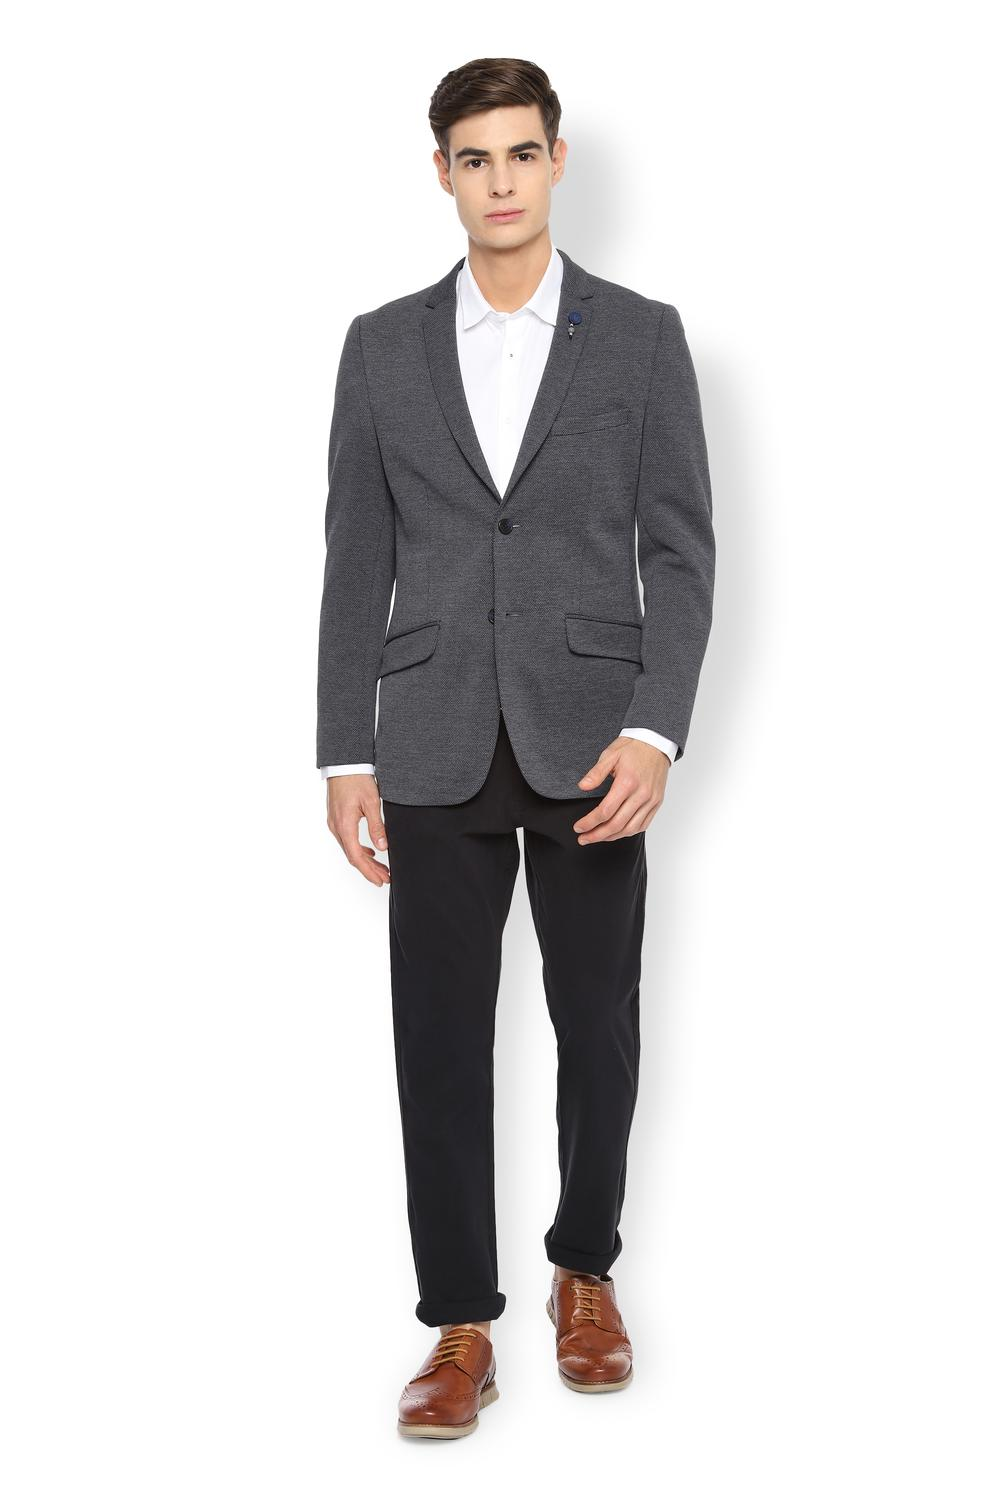

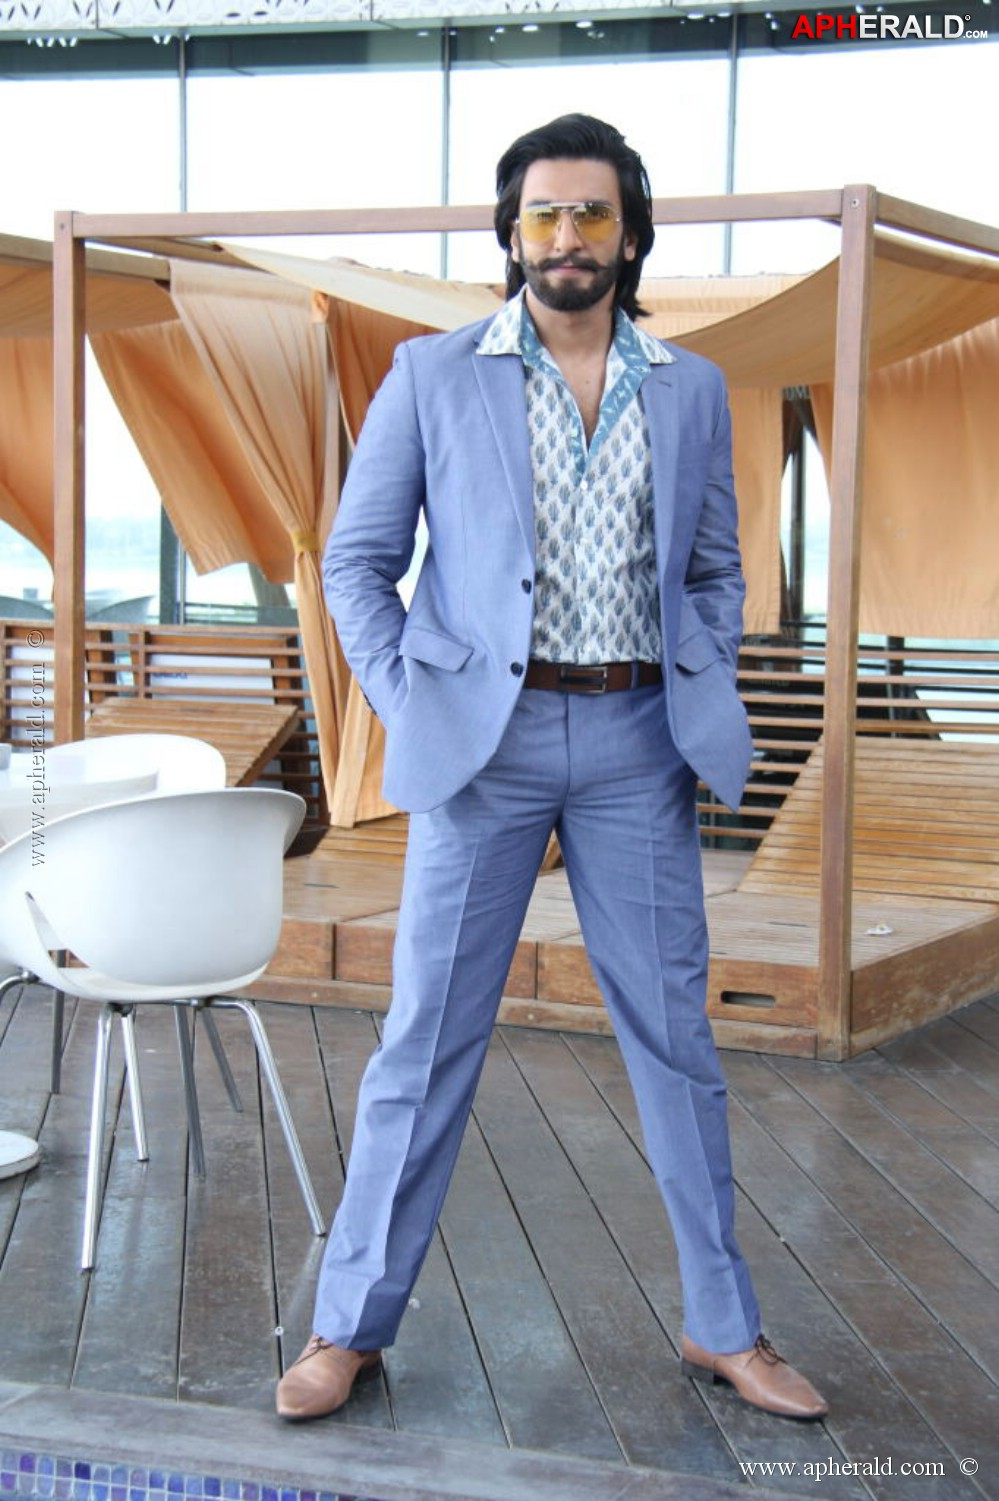

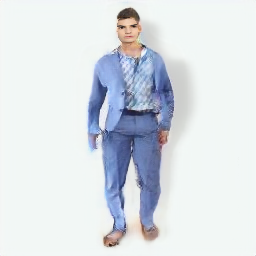

In [59]:
from IPython.display import Image, display
display(Image('/content/chad.jpg'))
display(Image('/content/ranveer.jpg'))
display(Image('./outputs/results/swappers/chad->ranveer.png'))

In [63]:
!python run_view.py --gpu_ids 0 --model viewer --output_dir ./outputs/results/  --src_path  /content/chad-ranveer.jpg   --bg_ks 13  --ft_ks 3 --has_detector  --post_tune --front_warp --bg_replace --save_res --ip http://51cb7644.ngrok.io --port 80

------------ Options -------------
T_pose: False
batch_size: 4
bg_ks: 13
bg_model: ./outputs/checkpoints/deepfillv2/net_epoch_50_id_G.pth
bg_replace: True
body_seg: False
cam_strategy: smooth
checkpoints_dir: ./outputs/checkpoints/
cond_nc: 3
data_dir: /p300/datasets/iPER
dataset_mode: iPER
debug: False
do_saturate_mask: False
face_model: assets/pretrains/sphere20a_20171020.pth
front_warp: True
ft_ks: 3
gen_name: impersonator
gpu_ids: 0
has_detector: True
hmr_model: assets/pretrains/hmr_tf2pt.pth
image_size: 256
images_folder: images_HD
ip: http://51cb7644.ngrok.io
is_train: False
load_epoch: 0
load_path: ./outputs/checkpoints/lwb_imper_fashion_place/net_epoch_30_id_G.pth
map_name: uv_seg
model: viewer
n_threads_test: 2
name: running
norm_type: instance
only_vis: False
output_dir: ./outputs/results/
part_info: assets/pretrains/smpl_part_info.json
port: 80
post_tune: True
pri_path: ./assets/samples/A_priors/imgs
repeat_num: 6
save_res: True
serial_batches: False
smpl_model: assets/pretr

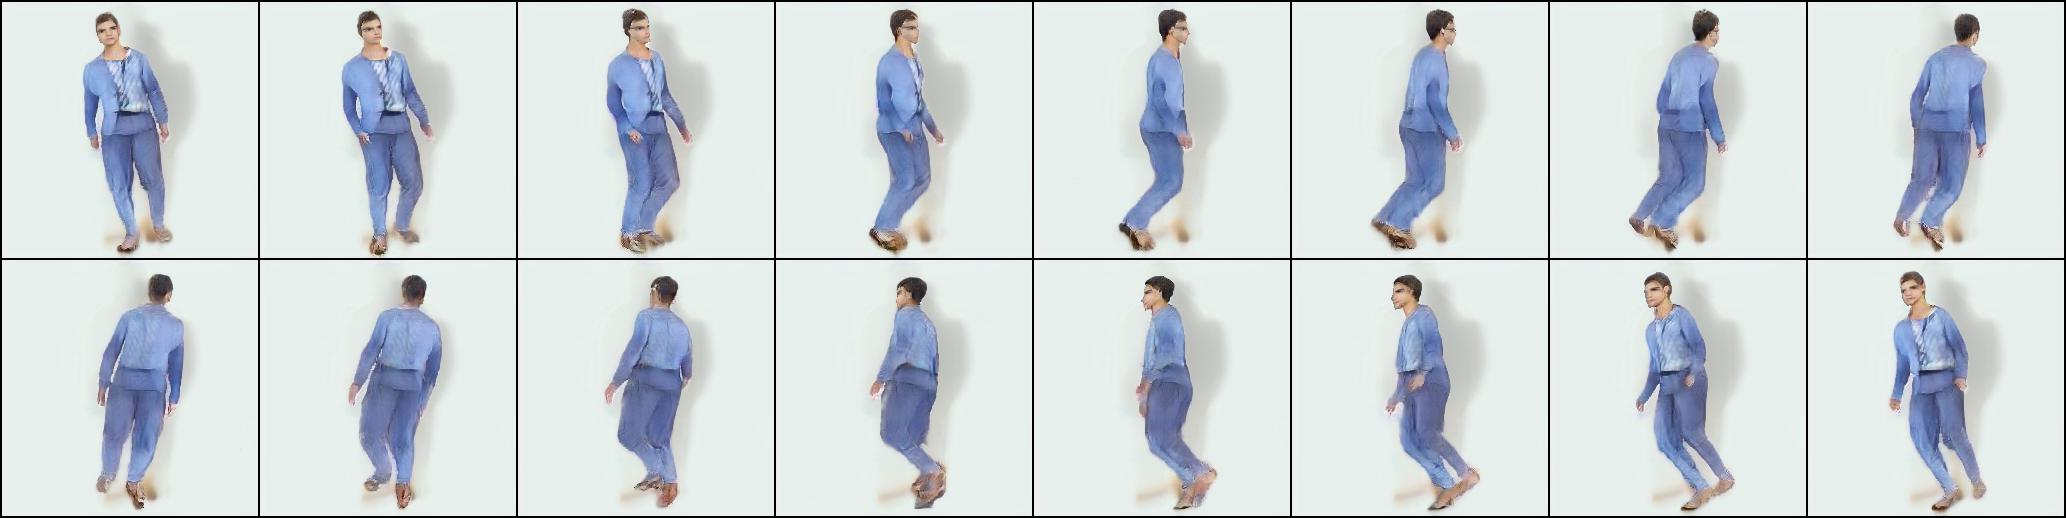

In [64]:
from IPython.display import Image, display
display(Image('/content/impersonator/outputs/results/viewers/chad-ranveer.jpg'))